# Предсказание оттока сотрудников

Ключ к успеху любой организации - это привлечение и удержание лучших сотрудников. Для HR-аналитиков одной из задач является
предотвращение ухода персонала. Для этого им необходимо знать факторы, увеличивающие вовлеченность сотрудников, и, наоборот, побуждающие сотрудников уйти.

<a href="https://drive.google.com/uc?id=1jAZLpihYxu_FPvN9PIJ1G4S_KvO_6Ku6
" target="_blank"><img src="https://drive.google.com/uc?id=1jAZLpihYxu_FPvN9PIJ1G4S_KvO_6Ku6"
alt="IMAGE ALT TEXT HERE" width="500" border="0" /></a>

**Бизнес-постановка задачи**

Очевидно, компании не выгодно терять своих сотрудников. На данный момент HR-ы "вручную" отслеживают комфортность рабочей среды, лично наблюдая за сотрудниками и общаясь с ними. Мы предлагаем построить модель, которая будет прогнозировать возможность ухода сотрудника, а также позволит выявить причины этого.

Такая модель позволит одновременно улучшить контроль над текучкой кадров и сократить штат HR-ов.

Мы попробуем на данных из Kaggle обучить модель машинного обучения, которая будет предсказывать отток сотрудников.
https://www.kaggle.com/patelprashant/employee-attrition

**Обзор доступных данных**

В выборке 4410 исторических наблюдений и 20 переменных, одна из которых - целевая.
Таким образом, про каждого из 4410 сотрудников мы знаем значения 20 их характеристик (возраст, пол, место и область работы, расстояние от дома и т.д.), в том числе значение целевой переменной: ушел сотрудник или нет.

Выборка была разбита на две части для обучения и для тестирования модели.
В обучающей выборке 3308 сотрудников, в тестовой выборке - 1102.

**Постановка задачи анализа данных**

Целью данной задачи является построение модели *классификации сотрудников*: на вход модель будет принимать данные о сотруднике, а на выходе она должна работать в двух режимах:

* выдавать вероятность ухода для данного сотрудника,
* выдавать правильный с точки зрения модели класс сотрудника (не доволен и собирается уйти или всё устраивает и остается).

Обучать модель мы будем по данным с платформы kaggle.

**Доступные признаки**

Данные содержат два типа переменных:

* Целевая: **Attrition**, ушел работник или нет
* Остальные переменные: 19 переменных, могут использоваться для прогноза целевой переменной.

| Имя столбца       | Значение                | Имя столбца             | Значение
|:-----------------:|:-----------------------:|:-----------------------:|:---------------------------------------------:|
| Age               | Возраст                 | NumCompaniesWorked      | Кол-во компаний, в которых работал сотрудник  |
| BusinessTravel    | Частота командировок    | PercentSalaryHike       | Процент повышения з/п за время работы         |
| Department        | Отдел                   | StandardHours           | Стандартная продолжительность рабочего дня    |
| DistanceFromHome  | Расстояние от дома в км | StockOptionLevel        | Уровень опциона на акции                      |
| Education         | Уровень образования     | TotalWorkingYears       | Общий трудовой стаж                           |
| EducationField    | Сфера образования       | TrainingTimesLastYear   | Общее время дополнительного обучения          |
| Gender            | Пол                     | YearsAtCompany          | Стаж работы в данной компании                 |
| JobRole           | Должностная роль        | YearsSinceLastPromotion | Кол-во лет с последнего повышения             |
| MaritalStatus     | Семейное положение      | YearsWithCurrManager    | Кол-во лет работы с текущим менеджером        |
| MonthlyIncome     | Ежемесячный доход       | Attrition               | **Целевая переменная:** ушел работник или нет |




## План анализа данных (data mining):

  1. Загрузить данные для обучения
  2. Обработать данные перед обучением модели
  3. Обучить модель на обучающей выборке
  4. Загрузить и предобработать данные для тестирования
  5. Провалидировать модель на тестовой выборке

## 1. Загрузить данные для обучения

**Шаг 1.1. Загружаем библиотеки**

Для корректной работы с данными в python требуется загрузить специальную библиотеку
**pandas**, программную библиотеку на языке python для обработки и анализа данных.

Основная нагрузка по обработке входных данных ложится на модуль **pandas**. С
помощью функций `pandas.read_*` можно подтягивать данные из простых текстовых
файлов `CSV`, таблиц **Excel**, таблиц **HTML**, а также **SQL** запросами
из корпоративных баз данных и прочих распределённых хранилищ.

In [ ]:
import pandas as pd

Для корректной работы с графиками в python требуется загрузить специальную библиотеку
**matplotlib**, программную библиотеку на языке python для визуализации данных двумерной и трехмерной графикой.

Графики используются для облегчения интерпретации полученных результатов, а также в качестве иллюстраций в презентациях и отчетах.

Оснвные методы для построения:
* plot() - графики
* semilogy() - график логарифметический
* hist() - гистограммы

In [ ]:
import matplotlib.pyplot as plt # загружаем библиотеку и для простоты обращения в коде называем её сокращенно plt

Основную вычислительную нагрузку берёт на себя модуль **Numpy**, с помощью которого можно быстро производить
вычисления сразу над массивами чисел.

In [ ]:
import numpy as np

Библиотека **scikit-learn** -- де факто наиболее популярный, разносторонний, хорошо
документированный и постоянно обогащающийся инструмент для построения моделей машинного
обучения.

Выберем из него несколько готовых функции для расчёта метрик качества классификации.

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc # метрики качества
from sklearn.metrics import confusion_matrix, accuracy_score # метрики качества
from sklearn.metrics import average_precision_score # метрики качества

Будем использовать библиотеку **MatplotLib**, которая отлично справляется с этой задачей.
Модуль **seaborn** устанавливет "приятные для глаз" палитры и стили для графиков.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid') # установить стиль whitegrid, другие стили можно найти в документации к seaborn

Некоторые библиотеки могут выводить на экран предупреждения, которые важно учитывать в "боевых" задачах. Но в учебной тетради мы укажем Python'у игнорировать их.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

**Шаг 1.2. Загрузим данные**

Для решения задачи мы будем использовать данные. Они состоят из двух частей: часть для обучения и часть для тестирования модели. Загружаем данные с помощие команды !wget. Для того, чтобы игнорировать сообщения в процессе загрузки используем магическую команду %%capture в первой строке.



In [ ]:
%%capture
!wget https://www.dropbox.com/s/jaea4smqjbmslsb/training_data.csv
!wget https://www.dropbox.com/s/y1i45d72k9byzak/test_data.csv

Наши данные в формате `csv` - comma separated values, значения, разделенные точкой. Обычно data scientists работают с табличными данными, которые представлены именно в таком виде. Чтобы загрузить такие данные, будем использовать функцию **`pd.read_csv()`** из библиотеки `pandas`.

In [ ]:
training_data = pd.read_csv('training_data.csv')

Посмотрим на 10 случайно выбранных записей из обучающего набора, для этого будем использовать функцию **sample()**. Параметр
**random_state=123** фиксирует "случайность", то есть на любом компьютере метод **sample()** будет работать одинаково.

In [ ]:
training_data.sample(10, random_state=123)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1930,45,Non-Travel,Sales,2,3,Medical,Female,Sales Executive,Married,66440,1.0,12,8,0,9.0,3,9,0,8,0
909,35,Travel_Rarely,Research & Development,9,3,Life Sciences,Male,Manager,Divorced,173990,6.0,12,8,0,7.0,3,2,2,2,1
222,30,Travel_Frequently,Research & Development,9,3,Other,Male,Healthcare Representative,Married,68250,1.0,14,8,0,1.0,2,1,0,0,1
2307,33,Travel_Rarely,Research & Development,9,3,Medical,Female,Manufacturing Director,Married,28990,1.0,17,8,0,15.0,3,15,5,7,0
576,34,Travel_Rarely,Sales,1,1,Marketing,Female,Laboratory Technician,Married,24760,1.0,19,8,0,6.0,2,6,1,3,0
1984,56,Travel_Frequently,Research & Development,1,2,Life Sciences,Female,Manufacturing Director,Married,52280,2.0,11,8,0,18.0,4,5,0,3,0
2984,28,Travel_Rarely,Research & Development,9,3,Medical,Male,Sales Representative,Single,46480,0.0,23,8,2,9.0,2,8,0,7,0
2942,32,Travel_Frequently,Research & Development,17,4,Other,Male,Sales Executive,Married,193280,1.0,15,8,3,5.0,2,5,0,3,0
43,18,Travel_Rarely,Sales,7,3,Life Sciences,Male,Research Scientist,Single,38120,1.0,15,8,0,0.0,3,0,0,0,0
2880,38,Travel_Rarely,Sales,8,2,Marketing,Male,Research Scientist,Married,49300,9.0,14,8,0,14.0,0,1,0,0,0


**Упражнение:** выведите на экран те строчки из таблицы `training_data`, для котрых возраст сотрудника (Age) не больше 35 и не меньше 25, для которых сотрудник мужчина(Male) и работает в отделе продаж (Sales). Также проверьте размерность полученной выборки

In [ ]:
traning_data_mid_age_male_sales = training_data[(training_data['Age'] >= 25) & (training_data['Age'] <= 35)
                                                & (training_data['Gender'] == 'Male') & (training_data['JobRole'].str.find('Sales') >= 0)]
traning_data_mid_age_male_sales.shape

(220, 20)

In [ ]:
traning_data_mid_age_male_sales.sample(5)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
2594,31,Non-Travel,Sales,23,1,Medical,Male,Sales Executive,Divorced,38670,1.0,11,8,1,4.0,4,4,2,3,0
1300,30,Travel_Rarely,Sales,8,2,Technical Degree,Male,Sales Representative,Married,63920,1.0,21,8,1,11.0,2,11,10,8,0
2770,30,Travel_Rarely,Sales,8,2,Technical Degree,Male,Sales Representative,Married,63920,1.0,21,8,1,11.0,2,11,10,8,0
2486,31,Travel_Rarely,Research & Development,8,5,Life Sciences,Male,Sales Executive,Married,131200,1.0,12,8,2,13.0,6,12,5,7,0
439,29,Travel_Frequently,Research & Development,29,1,Life Sciences,Male,Sales Representative,Married,192020,1.0,12,8,0,3.0,5,3,0,2,0


**Шаг 1.3. Посмотрим общую статистику по данным**

Посмотрим на технические параметры загруженных данных для обучения. Для этого вызовем метод **`describe()`** для набора данных *`training_data`*

Для удобства отображения мы транспонируем результат: меняем местами столбцы и строки.

In [ ]:
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3308.0,36.879383,9.146506,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,3308.0,9.201935,8.078147,1.0,2.0,7.0,14.0,29.0
Education,3308.0,2.918380,1.024933,1.0,2.0,3.0,4.0,5.0
MonthlyIncome,3308.0,64594.903265,46744.260986,10090.0,29040.0,49070.0,83210.0,199990.0
NumCompaniesWorked,3293.0,2.703310,2.506197,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,3308.0,15.230048,3.672812,11.0,12.0,14.0,18.0,25.0
StandardHours,3308.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
StockOptionLevel,3308.0,0.804716,0.860350,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,3301.0,11.283248,7.791024,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,3308.0,2.801995,1.290718,0.0,2.0,3.0,3.0,6.0


Обратим внимание на общие статистики показателей в данных:
* **count** -- количество значений, которые не являются пропущенными (`NaN`);
* **mean**, **std** -- среднее и разброс данных в соответствующем поле;
* остальные статистики -- минимальное и максимальное значения, и квантили.

Из таких характеристик столбцов мы уже можем извлечь некоторую информацию о данных:
* У столбца **Attrition** среднее 0.160. Значит, в нашей выборке только 16% сотрудников ушли из компании.
* У столбца **MonthlyIncome** существенно отличается масштаб значений: минимальное значение дохода - 10090, максимальное - 199990.
* У столбцов **NumCompaniesWorked** и **TotalWorkingYears** есть пропуски.

## 2. Обработать данные перед обучением модели

**Шаг 2.1. Проверяем данные на наличие пропусков и типов переменных**

Начнем с проверки общей информации о данных.
Для того чтобы это сделать, нужно обратиться вызвать у переменной *training_data* метод **info()**.

Напомним, что в конце необходимо поставить скобочки.

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308 entries, 0 to 3307
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3308 non-null   int64  
 1   BusinessTravel           3308 non-null   object 
 2   Department               3308 non-null   object 
 3   DistanceFromHome         3308 non-null   int64  
 4   Education                3308 non-null   int64  
 5   EducationField           3308 non-null   object 
 6   Gender                   3308 non-null   object 
 7   JobRole                  3308 non-null   object 
 8   MaritalStatus            3308 non-null   object 
 9   MonthlyIncome            3308 non-null   int64  
 10  NumCompaniesWorked       3293 non-null   float64
 11  PercentSalaryHike        3308 non-null   int64  
 12  StandardHours            3308 non-null   int64  
 13  StockOptionLevel         3308 non-null   int64  
 14  TotalWorkingYears       

Как мы уже видели, пропусков в данных не так много: только у столбцов  **NumCompaniesWorked** и **TotalWorkingYears**.

**Шаг 2.2. Заполнение пропусков**

Рассчитаем средние значения признаков в обучающей выборке, и заполним полученными
числами пропуски как в **тестовом наборе** данных, так и в **самой обучающей выборке**.

Мы будем заполнять средними значениями из обучающей выборки, так как при решении реальной задачи нам будут доступны только данные для обучения.

Для получения средних значений вызовем метод **`mean()`**. По умолчанию метод считает средним значения по столбцам. После выполнения ячейки средние значения записаны в переменной *`train_mean`*



In [ ]:
train_mean = training_data._get_numeric_data().mean()
train_mean

Age                           36.879383
DistanceFromHome               9.201935
Education                      2.918380
MonthlyIncome              64594.903265
NumCompaniesWorked             2.703310
PercentSalaryHike             15.230048
StandardHours                  8.000000
StockOptionLevel               0.804716
TotalWorkingYears             11.283248
TrainingTimesLastYear          2.801995
YearsAtCompany                 6.998791
YearsSinceLastPromotion        2.187122
YearsWithCurrManager           4.118501
Attrition                      0.160218
dtype: float64

**Упражнение:** Найдите среднее значение переменной "Кол-во компаний, в которых работал сотрудник"(NumCompaniesWorked) среди тех сотрудников, у которых месячный доход (MonthlyIncome) находится между 80000 и 120000

In [ ]:
training_data[training_data['MonthlyIncome'].isin(range(80000, 120000))].NumCompaniesWorked.mean()

2.1947115384615383

In [ ]:
training_data.loc[
  (training_data['MonthlyIncome'] >= 80000)
  & (training_data['MonthlyIncome'] <= 120000),
  'NumCompaniesWorked'
].mean()

2.1947115384615383

Пропуски в данных можно заполнять и разными методами:
* выборочной статистикой (среднее, медиана);
* прогнозами регрессии по известным признакам;
* случайными значениями.

Если относительно небольшая доля наблюдению имеет пропуски, то можно
вовсе исключить неполные наблюдения с пропущенными значениями из выборки.

Для заполнения средним значением, передадим на вход методу **`fillna()`** полученный ранее набор средних значений для каждого столбца. Опция `inplace=True` говорит, что мы запишем изменения прямо в существующий массив, а не создадим новый.

In [ ]:
training_data.fillna(train_mean, inplace=True)

Убедимся, что пропусков больше нет

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308 entries, 0 to 3307
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3308 non-null   int64  
 1   BusinessTravel           3308 non-null   object 
 2   Department               3308 non-null   object 
 3   DistanceFromHome         3308 non-null   int64  
 4   Education                3308 non-null   int64  
 5   EducationField           3308 non-null   object 
 6   Gender                   3308 non-null   object 
 7   JobRole                  3308 non-null   object 
 8   MaritalStatus            3308 non-null   object 
 9   MonthlyIncome            3308 non-null   int64  
 10  NumCompaniesWorked       3308 non-null   float64
 11  PercentSalaryHike        3308 non-null   int64  
 12  StandardHours            3308 non-null   int64  
 13  StockOptionLevel         3308 non-null   int64  
 14  TotalWorkingYears       

**Шаг 2.3. Работаем с целевой переменной**

*Какая переменная целевая?*

В данном случае по условию задачи мы должны прогнозировать уход сотрудника, поэтому целевая переменная - это Attrition, факт ухода или не ухода сотрудника.

Нам нужно выделить в отдельную переменную *training_values* столбец из нашей таблицы, который соответствует определенной выше целевой переменной. Для этого мы у таблицы *training_data* в квадратных скобках указываем имя нужного столбца. В нашем случае это имя записано в переменной *target_variable_name*.

In [ ]:
target_variable_name = 'Attrition'

In [ ]:
training_values = training_data[target_variable_name]

Чтобы посчитать количество сотрудников, которые уволились (значение переменной **Attrition** равно единице) и сотрудников, которые остались (значение **Attrition** равно нулю) вызовем метод **`value_counts()`**

In [ ]:
training_values.value_counts()

Attrition
0    2778
1     530
Name: count, dtype: int64

**Упражнение:** посчитайте количество значений в других столбцах датафрейма training_data с помощью метода value_counts().

In [ ]:
colz = training_data.columns[:-1]
val_cou = []
for i in colz:
  val_cou.append((i, training_data[i].value_counts()))

In [ ]:
val_cou[0]

('Age',
 Age
 35    172
 34    172
 31    157
 29    153
 36    153
 30    137
 32    135
 38    130
 33    129
 40    126
 37    117
 27    111
 42    107
 28    106
 26     93
 39     92
 45     91
 41     89
 43     74
 46     72
 44     71
 50     68
 24     60
 25     59
 47     56
 49     53
 55     50
 53     43
 52     43
 48     42
 51     42
 54     41
 22     35
 23     33
 21     31
 58     30
 56     30
 20     24
 59     20
 19     19
 18     19
 60     13
 57     10
 Name: count, dtype: int64)

Отделим входные переменные от выходной (целевой), чтобы можно было построить модель предсказания целевой переменной по входным. Для это нужно у переменной *`training_data`* вызвать метод **`drop()`**.

In [ ]:
training_points = training_data.drop(target_variable_name, axis=1)

In [ ]:
training_points.shape

(3308, 19)

Видно, что столбца действительно нет, а количество строк не изменилось.

## 3. Загрузить и предобработать данные для тестирования

**Шаг 3.1. Загрузим данные для тестирования**

Наши данные в формате `csv` - comma separated values, значения, разделенные точкой. Обычно data scientists работают с табличными данными, которые представлены именно в таком виде. Чтобы загрузить такие данные, будем использовать функцию **`pd.read_csv()`** из библиотеки `pandas`.

In [ ]:
test_data = pd.read_csv('test_data.csv')
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1102.0,37.057169,9.096386,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1102.0,9.164247,8.188807,1.0,2.0,7.0,14.0,29.0
Education,1102.0,2.896552,1.021213,1.0,2.0,3.0,4.0,5.0
MonthlyIncome,1102.0,66333.330309,48028.087236,10090.0,29730.0,49385.0,84712.5,199990.0
NumCompaniesWorked,1098.0,2.669399,2.477794,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,1102.0,15.147913,3.618613,11.0,12.0,14.0,18.0,25.0
StandardHours,1102.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
StockOptionLevel,1102.0,0.761343,0.825476,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,1100.0,11.270000,7.759277,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,1102.0,2.791289,1.284292,0.0,2.0,3.0,3.0,6.0


**Шаг 3.2. Предобработка данных для тестирования**

Тестовые данные нужно предобработать аналогично обучающим. Поэтому заполним сперва пропуски в данных.

Для заполнения средним значеним, передадим на вход методу **`fillna()`** полученный ранее набор средних значений для каждого столбца. Опция `inplace=True` говорит, что мы запишем изменения прямо в существующий массив, а не создадим новы

In [ ]:
test_data.fillna(train_mean, inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1102 non-null   int64  
 1   BusinessTravel           1102 non-null   object 
 2   Department               1102 non-null   object 
 3   DistanceFromHome         1102 non-null   int64  
 4   Education                1102 non-null   int64  
 5   EducationField           1102 non-null   object 
 6   Gender                   1102 non-null   object 
 7   JobRole                  1102 non-null   object 
 8   MaritalStatus            1102 non-null   object 
 9   MonthlyIncome            1102 non-null   int64  
 10  NumCompaniesWorked       1102 non-null   float64
 11  PercentSalaryHike        1102 non-null   int64  
 12  StandardHours            1102 non-null   int64  
 13  StockOptionLevel         1102 non-null   int64  
 14  TotalWorkingYears       

**Шаг 3.3. Отделяем целевую переменную**

Нам нужно выделить в отдельную переменную *test_values* столбец из нашей таблицы, который соответствует определенной выше целевой переменной. Для этого мы у таблицы *test_data* в квадратных скобках указываем имя нужного столбца. В нашем случае это имя записано в переменной *target_variable_name*.

In [ ]:
test_values = test_data[target_variable_name]

Отделим переменные для модели от выходной переменной (целевой). Для это нужно у переменной *`test_data`* нужно вызвать метод **`drop()`**.

In [ ]:
test_points = test_data.drop(target_variable_name, axis=1)

И проверяем результат записанный в test_points

In [ ]:
test_points.head(5)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,32,Travel_Rarely,Sales,10,3,Marketing,Female,Human Resources,Married,30720,5.0,12,8,0,9.0,4,5,1,3
1,52,Travel_Frequently,Research & Development,1,1,Life Sciences,Male,Laboratory Technician,Married,50060,3.0,16,8,1,31.0,2,9,0,0
2,37,Travel_Rarely,Sales,24,2,Life Sciences,Female,Laboratory Technician,Divorced,42570,4.0,15,8,0,9.0,2,1,0,0
3,28,Travel_Rarely,Research & Development,21,4,Life Sciences,Female,Healthcare Representative,Divorced,25000,1.0,16,8,2,6.0,3,5,0,4
4,22,Travel_Rarely,Research & Development,2,2,Life Sciences,Male,Sales Representative,Married,11020,6.0,19,8,0,4.0,3,2,2,2


## Шаг 4.  Обработать текстовые переменные

В наших данных 6 столбцов имеют значения типа object. В нашем случае, это текстовые признаки. Чтобы можно было подавать их на вход алгоритму, нам необходимо закодировать их.  

Мы рассмотрим два популярных метода кодирования категориальных признаков:
*  метод **get_dummies()** из библиотеки **pandas**
*  метод **LabelEncoder()** из библиотеки **sklearn**

Для начала нам необходимо определить какие из признаков категориальные

In [ ]:
text_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

Далее нам необходимо преобразовать значения в выбранных колонках к числам, потому что наши алгоритмы не умеют работать с текстом.

Первый способ заключается в том, чтобы заменить признаки типа:

|                 |       Отдел                   |  
|-----------------|-------------------------------|
|**Сотрудник 1**  |       Sales                   |
|**Сотрудник 2**  |       RnD                     |
|**Сотрудник 3**  |       HR                      |

Признаками типа:

|                 | Отдел - Sales ? | Отдел - Rnd ? | Отдел - HR ? |
|-----------------|-----------------|---------------|--------------|
|**Сотрудник 1**  |       Да  (1)   |      Нет (0)  |      Нет (0) |
|**Сотрудник 2**  |       Нет (0)   |      Да  (1)  |      Нет (0) |
|**Сотрудник 3**  |       Нет (0)   |      Нет (0)  |      Да  (1) |

Таким образом, наши новые признаки говорят относится ли сотрудник к определённому отделу или нет. При таком подходе для каждого категориального признака появляется столько новых колонок, сколько есть возможных категорий. Одна из колонок будет заполнена `1`, а остальные `0`.

In [ ]:
dummies = pd.get_dummies(data=training_points, columns=text_features)

В функцию **get_dummies()** в качестве параметров передаём:
*  **data** - исходные данные
*  **columns** - имена колонок, в которых находятся кагегориальные признаки

In [ ]:
dummies.head()

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,131160,1.0,11,8,0,1.0,6,...,False,False,False,False,False,False,False,False,True,False
1,31,10,1,41890,0.0,23,8,1,6.0,3,...,False,False,False,False,True,False,False,False,False,True
2,32,17,4,193280,1.0,15,8,3,5.0,2,...,False,False,False,False,False,True,False,False,True,False
3,38,2,5,83210,3.0,11,8,3,13.0,5,...,False,False,False,False,False,False,False,False,True,False
4,32,10,1,23420,4.0,12,8,2,9.0,2,...,False,False,False,False,False,True,False,False,False,True


Как видим, после кодирования у нас получилось на 20 признаков больше (39 вместо 19).

In [ ]:
training_points.shape

(3308, 19)

In [ ]:
dummies.shape

(3308, 39)

Второй способ кодирования категориальных признаков заключается в том, чтобы просто присвоить каждой категории уникальный номер, и заменить значения признаков на соответствующие номера.
Например, вместо таблицы:

|                 |       Отдел                   |  
|-----------------|-------------------------------|
|**Сотрудник 1**  |       Sales                   |
|**Сотрудник 2**  |       RnD                     |
|**Сотрудник 3**  |       RnD                     |
|**Сотрудник 4**  |       Sales                   |
|**Сотрудник 5**  |       HR                      |
|**Сотрудник 6**  |       RnD                     |

Получаем:

|                 |       Отдел                   |  
|-----------------|-------------------------------|
|**Сотрудник 1**  |       1                       |
|**Сотрудник 2**  |       2                       |
|**Сотрудник 3**  |       2                       |
|**Сотрудник 4**  |       1                       |
|**Сотрудник 5**  |       3                       |
|**Сотрудник 6**  |       2                       |

Здесь все значения **Sales** заменены на `1`, **RnD** заменены на `2`, **HR** заменены на `3`.

In [ ]:
from sklearn.preprocessing import LabelEncoder

Сперва создаем прототип кодировщика:

In [ ]:
label_encoder = LabelEncoder()

Так как нам нужно закодировать сразу список признаков, мы будем делать это в цикле. Рассматриваем каждый текстовый признак из списка *text_categor_cols*, далее:
1. методу **fit_transform()** передаем в качестве аргумента этот признак у обучающей выборки
2. методу **transform()** передаем в качестве аргумента этот признак у тестовой выборки

К полученным числовым представлениям признака будем прибавлять единичку, чтобы кодирование начиналось с 1, а не с 0. Затем результат будем записывать в табличку.

In [ ]:
for col in text_features:
    training_points[col] = label_encoder.fit_transform(training_points[col]) + 1
    test_points[col] = label_encoder.transform(test_points[col]) + 1

Посмотрим на данные теперь:

In [ ]:
training_points.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,3,3,6,2,2,1,1,2,131160,1.0,11,8,0,1.0,6,1,0,0
1,31,2,2,10,1,2,1,7,3,41890,0.0,23,8,1,6.0,3,5,1,4
2,32,2,2,17,4,5,2,8,2,193280,1.0,15,8,3,5.0,2,5,0,3
3,38,1,2,2,5,2,2,2,2,83210,3.0,11,8,3,13.0,5,8,7,5
4,32,3,2,10,1,4,2,8,3,23420,4.0,12,8,2,9.0,2,6,0,4


In [ ]:
training_points.shape

(3308, 19)

При таком способе кодирования количество признаков не меняется.

Чем может быть обусловлен выбор метода кодирования признаков?

##   5. Обучить модель на обучающей выборке

**Шаг 5.1. Выбираем метод, который будем использовать**

Мы воспользуемся двумя методами для построения моделей классификации и сравним их между собой:
* Логистическая регрессия *logistic regression*
* Градиентный бустинг над решающими деревьями *xgboost*

Логистическая регрессия - "адаптация" линейной регрессии для решения задачи классификации. Она принадлежит к классу обобщенных линейных моделей.
А вот с помощью градиентного бустинга можно эффективнее работать с лесом решающих деревьев, а значит лучше решать и задачу регрессии, и задачу классификации.

Для корректной работы с методами построения моделей в python требуется загрузить специальную библиотеку
**sklearn**, программную библиотеку на языке python для для машинного обучения и анализа данных.

Мы импортируем один модуль из этой библиотеки:
 * *linear_model* - тут находятся все линейные *и обобщенные линейные* модели, в том числе модель логистической регрессии.

In [ ]:
from sklearn import linear_model

В библиотеке **xgboost**, программной библиотеке на языке python, реализован градиентный бустинг над решающими деревьями как для задачи регрессии, так и для задачи классификации.

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

Чтобы создать модель логистической регресии, пишем имя модуля 'linear_model', затем точку, затем название модели.

Для этого нужно выполнить следующий код:

```python
logistic_regression_model = linear_model.logistic_regression_model()
logistic_regression_model
```

In [ ]:
logistic_regression_model = linear_model.LogisticRegression() # создаем модель

Результат выполнения должен быть следующим:

```python
LogisticRegression(C=1.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='warn', n_jobs=None,
          penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
```

In [ ]:
logistic_regression_model # смотрим, что получилось

LogisticRegression()

Чтобы создать модель случайного леса с градиентным бустингом, пишем имя модуля xgboost (xgb), затем точку, затем название модели.

Для этого нужно выполнить следующий код:

```python
xgboost_model = xgb.XGBClassifier()
xgboost_model
```

```python
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)
```

У модели `xgboost` три типа параметров: общие параметры, параметры бустера и параметры задачи.

Общие параметры относятся к тому, какой бустер мы используем для бустинга, обычно это дерево или линейная модель. Параметры бустера зависят от того, какой бустер вы выбрали (максимальная глубина дерева, количество деревьев в ансамбле и тд.) Параметры учебной задачи: регрессиия, классификация, ранжирование.

In [ ]:
xgboost_model = xgb.XGBClassifier(n_estimators=100)

In [ ]:
xgboost_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

У модели классификации на основе случайного леса больше параметров. Рассмотрим наиболее важные:
* параметр *n_estimators* определяет, сколько деревьев в лесу,
* в параметре *max_depth* устанавливается, какая максимальная глубина у дерева,

**Шаг 5.2. Обучить модель**

Теперь, когда мы создали прототипы обеих моделей, можем их обучить с помощью обучающей выборки.

Для этого вызываем метод **fit()** у каждой модели и передаем ему на вход два аргумента:
таблицу входных признаков и столбец значений целевой переменной - (training_points, training_values)

In [ ]:
logistic_regression_model.fit(training_points, training_values)

LogisticRegression()

Делаем тоже самое для модели решающего леса.

Возможно, будут предупреждения, о том, что в будущем планируются изменения в этой модели (FutureWarning).

In [ ]:
xgboost_model.fit(training_points, training_values)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

* Для двух разных моделей методы для обучения модели не отличаются.
* Мы получили две обученные модели.
* Теперь необходимо провалидировать модели на новых тестовых данных, которые не использовались при обучении модели.

# 6. Провалидировать модель на тестовой выборке

Сначала получим прогноз модели на тестовых данных `test_points` с помощью моделей логистической регрессии и решающего леса с градиентным бустингом.
Для этого для таких моделей запустим метод `predict`.

In [ ]:
test_predictions_logistic_regression = logistic_regression_model.predict(test_points)

In [ ]:
test_predictions_xgboost = xgboost_model.predict(test_points)

### Шаг 6.1. Точность прогноза

Посчитаем точность (accuracy) работы моделей. Напомним, что точность отражает, сколько в процентном соотношении от размера тестовой выборки модель угадала единичек и сколько угадала ноликов.

Функция для подсчета точности реализована в библиотеке **sklearn** и называется **`accuracy_score()`**. Импортируем её.

In [ ]:
from sklearn.metrics import accuracy_score

В функцию **`accuracy_score()`** необходимо передать два аргумента:
* истинные значения меток - *test_values*
* предсказания модели - *test_predictions_logistic_regression* или *test_predictions_random_forest*

In [ ]:
print(accuracy_score(test_values, test_predictions_logistic_regression))
print(accuracy_score(test_values, test_predictions_xgboost))

0.8357531760435571
0.9990925589836661


Сравним значения точности для наших моделей с точностью для константного классификатора, модели, которая всегда бы предсказывала больший класс, в нашем случае 0.
Для этого можно в функцию **`accuracy_score()`** в качестве второго аргумента передать массив нулей такого же размера, как и *test_values*. Это делается с помощью функции **`zeros_like()`** из библиотеки pandas, у которой один аргумент - *test_values*, массив с размером которого будет создан массив нулей.

In [ ]:
print(accuracy_score(test_values, np.zeros_like(test_values)))

0.8357531760435571


Как видно, значения точности для логистической регрессии равно точности для контстантного классификатора. И на самом деле, модель логистической регресси предсказывает только класс 0:

In [ ]:
pd.value_counts(test_predictions_logistic_regression)

0    1102
Name: count, dtype: int64

In [ ]:
pd.value_counts(test_predictions_xgboost)

0    922
1    180
Name: count, dtype: int64

Модель градиентного бустинга над решающими деревьями работает лучше, поэтому для дальнейшего исследования мы оставим её.  

### Шаг 6.2. Таблица сопряженности модели классификации

Напоминм, что **таблица сопряжённости** (матрица неточности, или Confusion matrix) содержит сводные показатели качества работы классификатора. **Строки** этой таблицы соответствуют **фактическим классам** тестового набора, а **столбцы** - **предсказанным** классификатором меткам.

Импортируем функцию для построения таблицы сопряженности из библиотеки **`sklearn`**.

In [ ]:
from sklearn.metrics import confusion_matrix

Таблица содержит четыре сводных показателя, каждый из которых отражает количество объектов в одной и четырех
категорий:
* **истинно позитивный** (*True positive*, **TP**) -- объект
класса `1` был верно помечен меткой `1`;
* **ложно позитивный** (*False positive*, **FP**) -- объект
фактически принадлежит классу `0`, но помечен меткой `1`;
* **истинно отрицательный** (*True negative*, **TN**) -- классификатор
верно определил, что объект класса `0` принадлежит классу `0`;
* **ложно отрицательный** (*False negative*, **FN**) -- классификатор
пометил объект меткой `0`, однако на самом деле объект принадлежит классу `1`.


Замечание: ошибки False positive часто называют **ложной тревогой**, а False negative - **пропуском цели**.

|                   |  Предсказано `0` |  Предсказано `1` |
|:-------------------|:------------------|:------------------|
|**Фактически** `0`  |       TN         |       FP         |
|**Фактически** `1`  |       FN         |       TP         |

Посмотрим на таблицу сопряженности для градиентного бустинга. Для этого в функцию **`confusion_matrix()`** необходимо передать два аргумента:
* истинные значения меток - *test_values*
* предсказания модели - *test_predictions_xgboost*

Далее для удобства мы запишем полученную матрицу в удобный табличный вид, воспользовавшись функцией **`DataFrame()`** из библиотеки **pandas**.

In [ ]:
xgboost_confusion_matrix = confusion_matrix(test_values, test_predictions_xgboost)
xgboost_confusion_matrix = pd.DataFrame(xgboost_confusion_matrix)

xgboost_confusion_matrix

,0,1
0,921,0
1,1,180


### Шаг 6.3. Прогноз вероятности принадлежности к классу

Вместо прогноза меток классов модель может с помощью метода **`predict_proba()`** выдавать метки вероятности принадлежности к классам.
Так как класса у нас 2: сотрудники, которые ушли и которые продолжили работать, то матрица будет размером **(количество объектов в тестовой выборке, 2)**.

In [ ]:
test_probabilities = xgboost_model.predict_proba(test_points)

Посмотрим на первые пять значений этой матрицу:

In [ ]:
test_probabilities[:5, :]

array([[0.9863889 , 0.0136111 ],
       [0.99676394, 0.00323607],
       [0.9970964 , 0.00290361],
       [0.9973561 , 0.00264389],
       [0.97749764, 0.02250233]], dtype=float32)

Вероятность принадлежности ко второму классу - во втором столбце матрицы вероятностей.

In [ ]:
test_probabilities = test_probabilities[:, 1]

Посмотрим на распределение предсказанной классификатором вероятности ухода сотрудника, метки `1`.

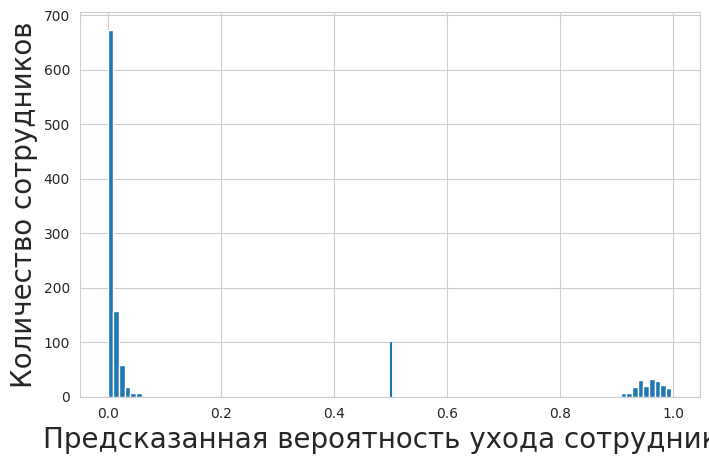

In [ ]:
plt.figure(figsize=(8, 5))

plt.hist(test_probabilities, bins=100)
plt.vlines(0.5, 0, 100)

plt.xlabel('Предсказанная вероятность ухода сотрудника', fontsize=20)
plt.ylabel('Количество сотрудников', fontsize=20);

Распределение сконцентрировано на отрезке от `0` до `0.4` и лишь незначительная часть вероятностей превышает порог `0.5`. Из
этого можно предположить, что классификатор склонен классифицировать все
объекты скорее как `0`, игнорируя метку `1`. Это происходит потому, что меток `1` в обучающей выборке сильно меньше, чем меток `0`.

## *Бонус: Точность и полнота

Метрики **Точность** (*Precision*) и **Полнота** (*Recall*) позволяют по-другому взглянуть на качество работы классификатора. Обе метрики рассчитываются на основе значений **таблицы сопряжённости**.

<a href="https://drive.google.com/uc?id=1jAZLpihYxu_FPvN9PIJ1G4S_KvO_6Ku6
" target="_blank"><img src="https://drive.google.com/uc?id=1Q3zfGLnyEYJmZbfVxKXoxpsndmoLwd7K"
alt="IMAGE ALT TEXT HERE" width="500" border="0" /></a>


Несмотря на то, что в английском языке слова *accuracy* и *precision*
синонимы, они соответствуют принципиально разным метрикам. В русском языке
оба слова переводятся как "точность".

Для начала получим матрицу сопряженности для классификатора на основе случайного леса:

In [ ]:
confusion_matrix_xgboost = confusion_matrix(test_values, test_predictions_xgboost)

|                   |  Предсказано `0` |  Предсказано `1` |
|-------------------|------------------|------------------|
|**Фактически** `0` |       TN         |       FP         |
|**Фактически** `1` |       FN         |       TP         |

Выделим каждое значение в отдельную переменную:

In [ ]:
TN, FP = confusion_matrix_xgboost[0, 0], confusion_matrix_xgboost[0, 1]

FN, TP = confusion_matrix_xgboost[1, 0], confusion_matrix_xgboost[1, 1]

Полнота (**Recall**) классификатора равна доли истинно положительных срабатываний **TPR**
(отношение $\frac{TP}{TP + FN}$). Эту характеристику можно интерпретировать, как
"чувствительность" классификатора к объектам класса `1`. Чем ближе к $100\%$, тем
реже классификатор "пропускает" положительный объект (в данном случае истинного класса `1`).

In [ ]:
recall = TP / (TP + FN)

print("Полнота: %.2f%%" % (100 * recall))

Полнота: 99.45%


Точность классификатора (**Precision**) -- это отношение $\frac{TP}{TP + FP}$. Оно отражает,
насколько разборчиво классификатор присваивает метки положительного класса `1`. Чем выше этот показатель,
тем "реже" объекты, помеченные как `1`, являются на самом деле примерами из класса `0`.

In [ ]:
precision = TP / (TP + FP)

print("Точность: %.2f%%" % (100 * precision))

Точность: 100.00%


Классификатор с высокой полнотой, но низкой точностью срабатывает очень
часто, однако при этом большинство результатов ошибочны (много ложных
срабатываний).

Наоборот, если у классификатора низкая полнота, но высокая точность,
то он срабатывает достаточно редко, но при этом почти безошибочно определяет
объекты класса `1` (много пропущенных объектов, ложное "бездействие").

### Кривая precision-recall

В пространстве **precision-recall** можно построить кривую, аналогичную **ROC**-кривой. Она также отражает зависимость метрик от порога классификации и косвенно друг от друга. В **sklearn** для построения этой кривой есть функция **precision_recall_curve()**<br/>

Получим координаты точек кривой **PR** для тестового набора данных, для этого функции **precision_recall_curve()** нужно передать два аргумента:
* истинные значения - *test_values*
* предсказанные вероятности - *test_probabilities*

In [ ]:
precision, recall, _ = precision_recall_curve(test_values, test_probabilities)

Нарисуем кривую precision-recall:

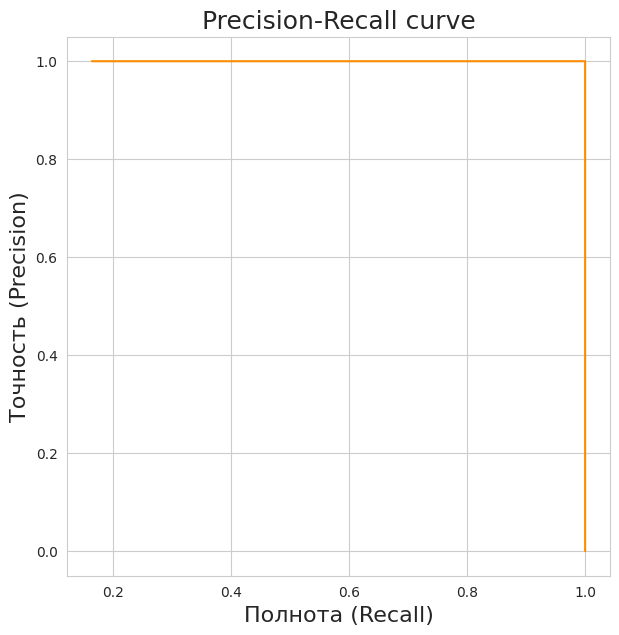

In [ ]:
plt.figure(figsize=(7, 7))

plt.plot(precision, recall, color='darkorange')

plt.title('Precision-Recall curve', fontsize=18)
plt.xlabel('Полнота (Recall)', fontsize=16)
plt.ylabel('Точность (Precision)', fontsize=16)

plt.show()

Чем ближе кривая **PR** к **правому верхнему** углу тем лучше качество классификации.

Площадь под **precision-recall** рассчитывается отдельной функцией **average_precision_score()**:

In [ ]:
pr_auc_value = average_precision_score(test_values, test_probabilities)

print("PR-AUC на тестовой выборке:", pr_auc_value)

PR-AUC на тестовой выборке: 0.9999999999999999


Большая площадь под кривой отражает высокие метрики точности и полноты,
что означает низкое число ложных срабатываний, и низкое число пропущенных
объектов интересующего нас класса `1`.

Также нарисуем ROC кривую классификатора.

In [ ]:
false_positive_rates, true_positive_rates, threshold = roc_curve(test_values, test_probabilities)

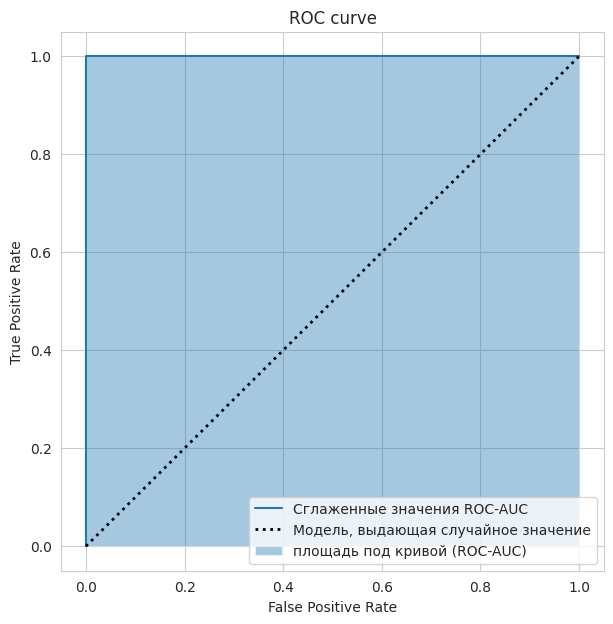

In [ ]:
# создаём график
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="mid", alpha=0.4, label='площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_value = roc_auc_score(test_values, test_probabilities)

print("ROC-AUC на тестовой выборке:", roc_auc_value)

ROC-AUC на тестовой выборке: 1.0


Типичная шкала для **ROC-AUC** (часто все зависит от задачи):
* $0.90$ - $1.00$ отлично;
* $0.80$ - $0.90$ хорошо;
* $0.70$ - $0.80$ удовлетворительно;
* $0.60$ - $0.70$ плохо;
* $0.50$ - $0.60$ очень плохо;
* $0.00$ - $0.50$ классификатор перепутал метки.

## *Бонус 2: Определение важности признаков

Очевидно, что не все собранные признаки будут одинаково полезны. После обучения алгоритма мы можем посмотреть какие из признаков больше влияют на результат. Если в наборе данных окажутся бесполезные признаки, то их можно удалить, чтобы уменьшить время обучения. В алгоритмах библиотеки **sklearn** посмотреть на важность признаков можно с помощью свойства **feature_importances_**

In [ ]:
importances = xgboost_model.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
importances.shape

(19,)

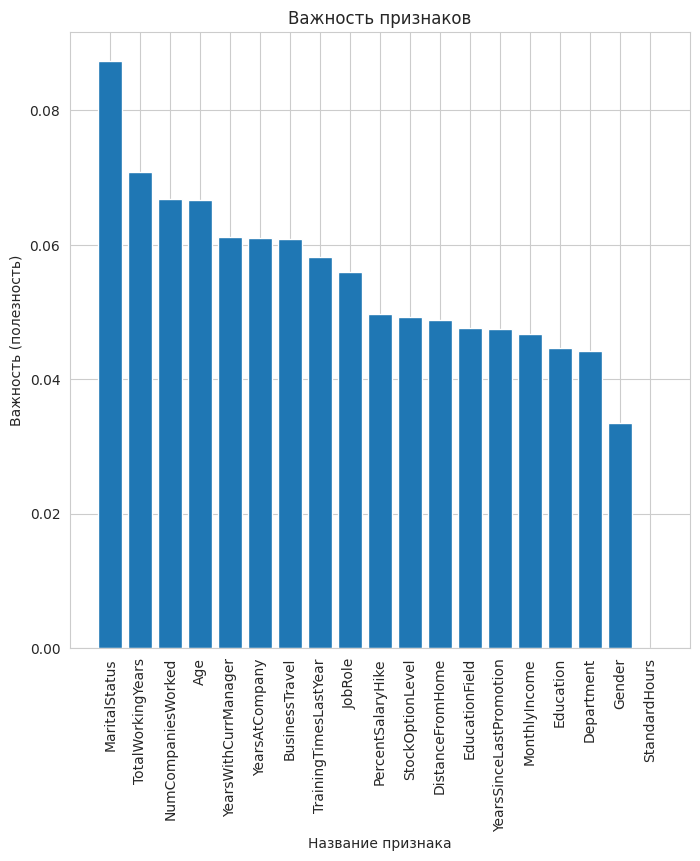

In [ ]:
plt.figure(figsize=(8, 8))

plt.title('Важность признаков')
plt.ylabel('Важность (полезность)')
plt.xlabel('Название признака')

plt.bar(training_points.columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()

In [ ]:
importances = logistic_regression_model.coef_.flatten()
indices = np.argsort(importances)[::-1]

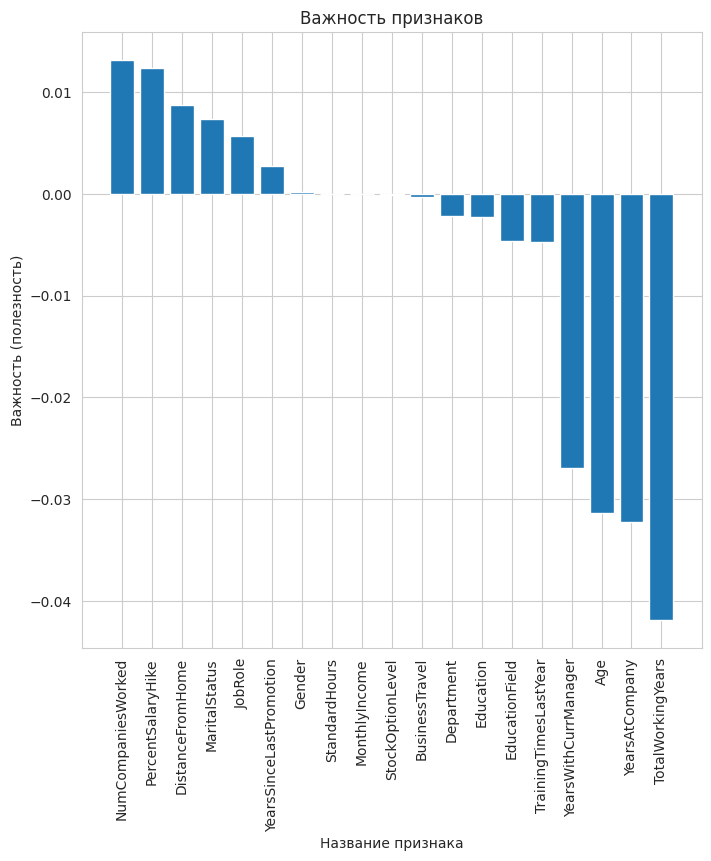

In [ ]:
plt.figure(figsize=(8, 8))

plt.title('Важность признаков')
plt.ylabel('Важность (полезность)')
plt.xlabel('Название признака')

plt.bar(training_points.columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()